In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#Read in the given data files
titanic_train = pd.read_csv('../input/titanic/train.csv')
titanic_test = pd.read_csv('../input/titanic/test.csv')

### Results
Best Model on test data for comp:

Model Parameters:

Best Model during training and evaluation:

Model Parameters:

Model Accuracy during training:

Model Accuracy on test data for comp:

### Process:
* Get basic info
* Use various plots to visualize relationships
    * Compare features against survived
* Feature engineering
* Determine final data setup and standardize
* Train and evaluate models
    * Naive Bayes (Gaussian (GNB) and Bernoulli (BNB))
    * Support Vector Machine (SVC)
    * Logistic Regression (LR)
    * K-nearest neighbors (KNN)
    * Decision Tree Classifier (DTC)
    * Random Forest Classifier (RFC)
* Check all models on 

In [3]:
# Shape of the training data
titanic_train.shape

(891, 12)

In [4]:
# Shape of the test data
titanic_test.shape

(418, 11)

In [5]:
891/(418+891)

0.680672268907563

Note: Training set is ~68% of total data

In [6]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We have null values in Age, Cabin, and Embarked that we will need to deal with. 

In [9]:
outcome = ['Survived']
features = ['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

In [10]:
df_num = titanic_train[['Age','SibSp','Parch','Fare']]
df_cat = titanic_train[['Pclass','Name','Sex','Ticket','Cabin','Embarked']]

#### First we will check the distributions of our numerical variables

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

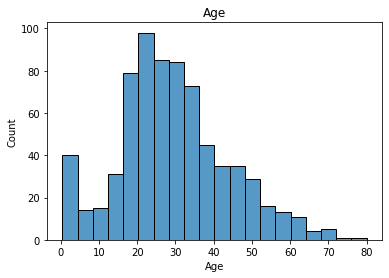

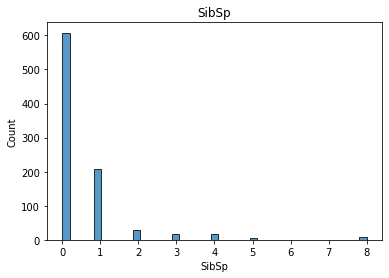

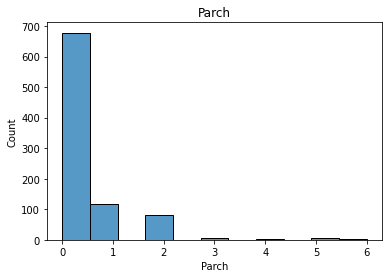

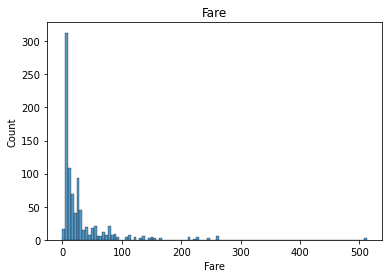

In [12]:
for i in df_num.columns:
    plot = sns.histplot(df_num[i])
    plt.title(i)
    plt.show()

Note: Age has a fairly normal distribution while the others skew towards the min. Also looks like we might have some outliers in our fare. 

#### Closer look at high fare passengers

In [13]:
df_high_fare = titanic_train[df_num['Fare']>200]
df_high_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [14]:
df_high_fare['Survived'].mean()

0.7

We do see that 70% of people that had a relatively high fair survived. 

#### Next we will check correlations between our numeric features

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


Text(0.5, 1.0, 'Numeric Feature Heatmap')

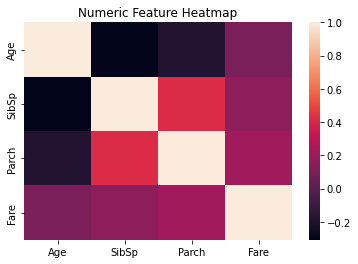

In [15]:
print(df_num.corr())
sns.heatmap(df_num.corr())
plt.title('Numeric Feature Heatmap')

In [16]:
#Compare survival rate across numeric features
pd.pivot_table(titanic_train, index='Survived', values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


We notice a few things:
* The average age of survivors is slightly lower. 
    * What was the survival rate of children 'Age'<18?
* The fare cost of survivors skews fairly high. 
    * Matches with what we saw in the last section.
* Survivors tended to have higher parent/child values but lower sibling/spouse values.
    * We will check if children tended to survive. If so it might be that their mothers also survived but possibly less impact on adult spouses and siblings. 


#### Analyzing info about children that survived

In [17]:
for i in [5,10,15,20]:
    print('Survival rate Age < ' + str(i) + ': ', titanic_train[titanic_train['Age']<i]['Survived'].mean())

Survival rate Age < 5:  0.675
Survival rate Age < 10:  0.6129032258064516
Survival rate Age < 15:  0.5769230769230769
Survival rate Age < 20:  0.4817073170731707


As expected young children have a higher survival rate. 

#### Now we look at categorical features

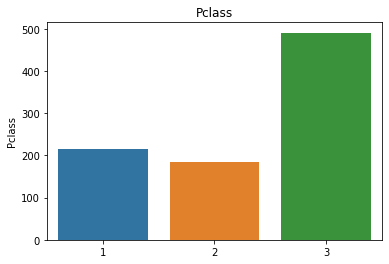

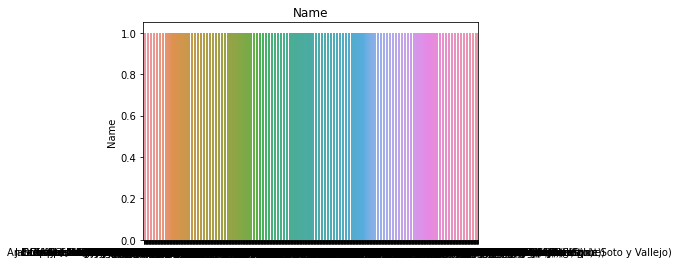

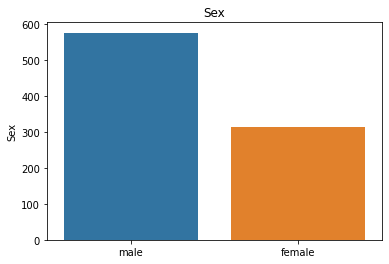

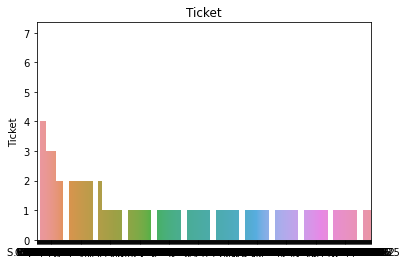

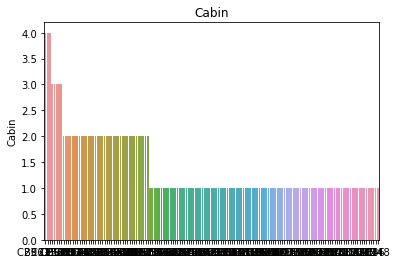

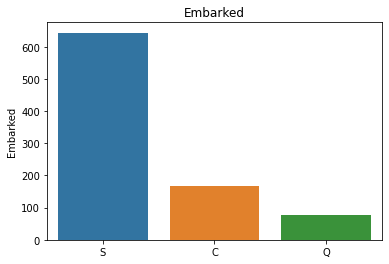

In [18]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts()).set_title(i)
    plt.show()

Observations:
* Plcass 3 is the largest class
* Not particularly useful for Name
* There are almost double the number of males
* Tickets and Cabins need to be grouped to be more meaningful
* Most passengers embarked from S

In [19]:
#We look at pivot tables for the three categorical features that have a small number of groups.
small_cat = ['Pclass','Sex','Embarked']
for i in small_cat:
    print(pd.pivot_table(titanic_train, index='Survived', columns=i, values='Ticket', aggfunc='count' ))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


Observations:
* Class 3 had a lower survival rate and class 1 had a slightly higher survival rate
* Females had a higher survival rate than males
* It seems people that embarked from C had a higher survival rate although I currently don't have an explanation for this. 

#### Feature Engineering

Things we can do:
* Group similar cabins
* Group similar tickets
* Check names for important titles

In [20]:
titanic_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Cabins have letters corresponding to the floor of the ship

In [21]:
#Group Cabins based on their first term.  n will map to from nAn
titanic_train['CabinFloor'] =  titanic_train.Cabin.apply(lambda x: str(x)[0])
titanic_train['CabinFloor'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinFloor, dtype: int64

In [22]:
#Check the relationship with survival
pd.pivot_table(titanic_train, index='Survived', columns='CabinFloor', values='Name', aggfunc='count')

CabinFloor,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


It seem like this does give us some information about the survival rate. 

In [23]:
titanic_train.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

After a bit of research, I believe that ticket numbers are based on where the ticket was purchased and might not provide any useful information.  We may choose to drop this feature. 

In [24]:
#Quick look again at the names
titanic_train['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [25]:
#Lets try to pull the title from the name
titanic_train['Title'] = titanic_train.Name.apply(lambda x: x.split(', ')[1].split('.')[0])
titanic_train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

#### Cleaning up the data
* Replace nAn with mean in Age column
* Normalize fare (Will be done in pipeline)
* Scale features (Will be done in pipeline)
* one-hot encode Cabin, Title, Pclass, Sex, Embarked
* drop Cabin, Name, Ticket
* Do same process based on info from training on the test data. 

In [26]:
#Replace nAn with mean in Age column use train mean to replace nAn in test data
titanic_train['Age'] = titanic_train.Age.fillna(titanic_train.Age.mean())
titanic_test['Age'] = titanic_test.Age.fillna(titanic_train.Age.mean())

In [27]:
#Add Title Feature to test data
titanic_test['Title'] = titanic_test.Name.apply(lambda x: x.split(', ')[1].split('.')[0])
titanic_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [28]:
#Group Cabins based on their first term.  n will map to from nAn
titanic_test['CabinFloor'] =  titanic_test.Cabin.apply(lambda x: str(x)[0])
titanic_test['CabinFloor'].value_counts()

n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: CabinFloor, dtype: int64

In [29]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'CabinFloor'],
      dtype='object')

In [30]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'CabinFloor', 'Title'],
      dtype='object')

In [31]:
X_train = titanic_train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','CabinFloor','Title']]
y_train = titanic_train[['Survived']]
X_test = titanic_test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','CabinFloor','Title']].copy()

#### One-hot encoding
Now we need to think about One-hot encoding...
* 'Pclass': There is a natural ranking of the classes 1,2,3 so we will leave this as numerical
* Likewise for 'SibSp', 'Parch', 'Age' and 'Fare'
* This leaves 'Sex', 'Embarked', 'CabinFloor' and 'Title'.
    * I have already seen that the categories for 'Sex' and 'CabinFloor' in the training data contain those from the test data. 
    * The 'Title' categories do have some differences.  We have access to the test data so we could make a new column for all possible titles but to maintain real-world accuracy we should build our models with only info from the training data. 
    * I think 'Embarked' has the same options but we will double check.

In [32]:
print(X_train['Embarked'].value_counts())
print(X_test['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    object 
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked    889 non-null    object 
 7   CabinFloor  891 non-null    object 
 8   Title       891 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [34]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    object 
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        417 non-null    float64
 6   Embarked    418 non-null    object 
 7   CabinFloor  418 non-null    object 
 8   Title       418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


2 things:
* There are some null 'Embarked' values in our training data, which is not an issue
* There is a single null value in our test data under fare, which we will fix using the median fare from the training data. 

In [35]:
X_test['Fare'] = X_test.Fare.fillna(X_train.Fare.median())
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    object 
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Embarked    418 non-null    object 
 7   CabinFloor  418 non-null    object 
 8   Title       418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'CabinFloor', 'Title'],
      dtype='object')

In [38]:
#One hot encode the training data
onehotencoder = OneHotEncoder(handle_unknown='ignore')
cat_feat = ['Sex', 'Embarked', 'CabinFloor' ,'Title']
num_feat = ['Pclass','Age','SibSp','Parch','Fare']

#fit to the training data
onehotencoder.fit(X_train[cat_feat])

#pull new column names
new_columns = onehotencoder.get_feature_names_out(cat_feat)

#transform and join back to X_train and X_test with new column names
enc_data_train = pd.DataFrame(onehotencoder.transform(X_train[cat_feat]).toarray(), columns=new_columns)
X_train = X_train[num_feat].join(enc_data_train)
enc_data_test = pd.DataFrame(onehotencoder.transform(X_test[cat_feat]).toarray(), columns=new_columns)
X_test = X_test[num_feat].join(enc_data_test)



In [39]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan',
       'CabinFloor_A', 'CabinFloor_B', 'CabinFloor_C', 'CabinFloor_D',
       'CabinFloor_E', 'CabinFloor_F', 'CabinFloor_G', 'CabinFloor_T',
       'CabinFloor_n', 'Title_Capt', 'Title_Col', 'Title_Don', 'Title_Dr',
       'Title_Jonkheer', 'Title_Lady', 'Title_Major', 'Title_Master',
       'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs',
       'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess'],
      dtype='object')

In [40]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan',
       'CabinFloor_A', 'CabinFloor_B', 'CabinFloor_C', 'CabinFloor_D',
       'CabinFloor_E', 'CabinFloor_F', 'CabinFloor_G', 'CabinFloor_T',
       'CabinFloor_n', 'Title_Capt', 'Title_Col', 'Title_Don', 'Title_Dr',
       'Title_Jonkheer', 'Title_Lady', 'Title_Major', 'Title_Master',
       'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs',
       'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess'],
      dtype='object')

#### Start building a pipeline to use on our models

We would like the pipeline to do the following:
* Scale the data (MinMaxScaler(), StandardScaler(), or RandomScaler())
* Fit a model

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [42]:
df_results = pd.DataFrame(columns=['Model','Score'])
df_results['Model']=['GNB','SVC','KNN','XGB','RFC']

In [43]:
pipeline = Pipeline([('scaler', StandardScaler()), ('model','passthrough')])

In [44]:
param_gnb = [
    {
        'model':[GaussianNB()],
    }
]
grid_gnb = GridSearchCV(pipeline, param_grid=param_gnb, cv=5, scoring='accuracy')
grid_gnb.fit(X_train,y_train.values.ravel())

df_results['Score'][0] = grid_gnb.best_score_
df_results

,Model,Score
0,GNB,0.693591
1,SVC,NaN
2,KNN,NaN
3,XGB,NaN
4,RFC,NaN


In [45]:
param_svc = [
    {
        'model':[SVC(random_state=2)],
        'model__kernel':['linear','poly','rbf','sigmoid']
    }
]
grid_svc = GridSearchCV(pipeline, param_grid=param_svc, cv=5, scoring='accuracy')
grid_svc.fit(X_train,y_train.values.ravel())

print(grid_svc.best_params_)
df_results['Score'][1] = grid_svc.best_score_
df_results

{'model': SVC(random_state=2), 'model__kernel': 'rbf'}


,Model,Score
0,GNB,0.693591
1,SVC,0.822654
2,KNN,NaN
3,XGB,NaN
4,RFC,NaN


In [46]:
param_knn = [
    {
        'model':[KNeighborsClassifier()],
        'model__n_neighbors':[2,3,4,5,6,7],
        'model__algorithm':['auto','ball_tree','kd_tree']
    }
]
grid_knn = GridSearchCV(pipeline, param_grid=param_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train,y_train.values.ravel())



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', 'passthrough')]),
             param_grid=[{'model': [KNeighborsClassifier(n_neighbors=6)],
                          'model__algorithm': ['auto', 'ball_tree', 'kd_tree'],
                          'model__n_neighbors': [2, 3, 4, 5, 6, 7]}],
             scoring='accuracy')

In [47]:
print(grid_knn.best_params_)
df_results['Score'][2] = grid_knn.best_score_
df_results

{'model': KNeighborsClassifier(n_neighbors=6), 'model__algorithm': 'auto', 'model__n_neighbors': 6}


,Model,Score
0,GNB,0.693591
1,SVC,0.822654
2,KNN,0.819296
3,XGB,NaN
4,RFC,NaN


In [48]:
param_xgb = [
    {
        'model':[XGBClassifier()],
        'model__eta':[.01,.05,.1,.15,.2,.25,.3],
        'model__min_child_weight':[1,2,3],
        'model__max_depth':[3,4,5,6,7,8,9,10]
    }
]
grid_xgb = GridSearchCV(pipeline, param_grid=param_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train,y_train.values.ravel())



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', 'passthrough')]),
             param_grid=[{'model': [XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eta=0.2, eval_metric=None,
                                                  gamma=None, gpu_id=None,
                                                  grow_...
                                                  max_delta_step=None,
                                          

In [49]:
print(grid_xgb.best_params_)
df_results['Score'][3] = grid_xgb.best_score_
df_results

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, ...), 'model__eta': 0.2, 'model__max_depth': 4, 'model__min_child_weight': 3}


,Model,Score
0,GNB,0.693591
1,SVC,0.822654
2,KNN,0.819296
3,XGB,0.844009
4,RFC,NaN


In [50]:
param_rfc = [
    {
        'model':[RandomForestClassifier()],
        'model__n_estimators':[100,140,160,180,200],
        'model__criterion':['gini','entropy','log_loss']
    }
]
grid_rfc = GridSearchCV(pipeline, param_grid=param_rfc, cv=5, scoring='accuracy')
grid_rfc.fit(X_train,y_train.values.ravel())

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packag

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', 'passthrough')]),
             param_grid=[{'model': [RandomForestClassifier(criterion='entropy',
                                                           n_estimators=200)],
                          'model__criterion': ['gini', 'entropy', 'log_loss'],
                          'model__n_estimators': [100, 140, 160, 180, 200]}],
             scoring='accuracy')

In [51]:
print(grid_rfc.best_params_)
df_results['Score'][4] = grid_rfc.best_score_
df_results

{'model': RandomForestClassifier(criterion='entropy', n_estimators=200), 'model__criterion': 'entropy', 'model__n_estimators': 200}


,Model,Score
0,GNB,0.693591
1,SVC,0.822654
2,KNN,0.819296
3,XGB,0.844009
4,RFC,0.801343


In [52]:
gnb_prediction = grid_gnb.predict(X_test)
svc_prediction = grid_svc.predict(X_test)
knn_prediction = grid_knn.predict(X_test)
xgb_prediction = grid_xgb.predict(X_test)
rfc_prediction = grid_rfc.predict(X_test)

In [53]:
total_prediction = gnb_prediction+svc_prediction+knn_prediction+xgb_prediction+rfc_prediction
total_prediction

array([0, 1, 0, 1, 2, 0, 2, 0, 4, 0, 0, 0, 5, 0, 5, 4, 0, 1, 2, 3, 0, 4,
       4, 0, 5, 0, 5, 1, 1, 0, 0, 0, 3, 1, 2, 1, 1, 2, 0, 3, 0, 2, 0, 4,
       5, 0, 0, 0, 5, 4, 0, 0, 3, 5, 0, 0, 0, 1, 0, 5, 0, 0, 0, 4, 5, 4,
       4, 0, 0, 5, 4, 0, 2, 3, 5, 0, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 2,
       5, 4, 2, 0, 5, 0, 0, 0, 4, 0, 2, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 1,
       0, 4, 2, 3, 5, 0, 0, 5, 0, 4, 4, 0, 4, 0, 0, 4, 0, 4, 1, 0, 0, 2,
       0, 0, 0, 0, 1, 0, 2, 0, 0, 4, 1, 0, 2, 0, 2, 0, 2, 0, 5, 0, 0, 4,
       0, 0, 5, 2, 2, 3, 4, 4, 4, 0, 0, 1, 0, 0, 4, 1, 0, 1, 0, 0, 0, 4,
       4, 0, 5, 5, 0, 4, 5, 0, 5, 0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 5, 3,
       0, 2, 4, 4, 3, 4, 0, 0, 2, 0, 2, 0, 0, 0, 0, 3, 0, 0, 4, 0, 5, 0,
       4, 0, 5, 1, 4, 2, 0, 4, 0, 0, 0, 4, 0, 0, 2, 0, 2, 1, 4, 5, 4, 4,
       3, 0, 2, 1, 4, 0, 4, 2, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 4,
       0, 0, 0, 0, 1, 0, 1, 0, 5, 4, 0, 4, 0, 0, 0, 0, 1, 4, 4, 2, 4, 0,
       0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 4, 0, 0, 0, 0,

In [54]:
#build a new submission combining votes with equal weight from all models
for i,x in enumerate(total_prediction):
    if x > 2:
        total_prediction[i] = 1
    else:
        total_prediction[i] = 0
total_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [55]:
#Output submission files
gnb_output = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived' : gnb_prediction})
gnb_output.to_csv('submission_gnb.csv', index = False)
print("Your GNB submission was saved successfully!")
svc_output = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived' : svc_prediction})
svc_output.to_csv('submission_svc.csv', index = False)
print("Your SVC submission was saved successfully!")
knn_output = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived' : knn_prediction})
knn_output.to_csv('submission_knn.csv', index = False)
print("Your KNN submission was saved successfully!")
xgb_output = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived' : xgb_prediction})
xgb_output.to_csv('submission_xgb.csv', index = False)
print("Your XGB submission was saved successfully!")
rfc_output = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived' : rfc_prediction})
rfc_output.to_csv('submission_rfc.csv', index = False)
print("Your RFC submission was saved successfully!")
total_output = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived' : total_prediction})
total_output.to_csv('submission_total.csv', index = False)
print("Your TOTAL submission was saved successfully!")

Your GNB submission was saved successfully!
Your SVC submission was saved successfully!
Your KNN submission was saved successfully!
Your XGB submission was saved successfully!
Your RFC submission was saved successfully!
Your TOTAL submission was saved successfully!
